In [7]:
%reload_ext autoreload
import ktwo19
import ktwo19.io
import ttv.lithwickmod
import ttv.plotting
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/petigura/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['fix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [138]:
mu2.value

1.0011563018450554e-05

In [153]:
times = ktwo19.io.load_times()
times = np.array(pd.DataFrame(times).to_records(index=False))

mass1 = 26.91
mass1_err = 5
mass2 = 6
mass2_err = 6
from astropy import constants as c
smass = 0.9 * c.M_sun/c.M_earth

mu1 = (mass1 / smass).value
mu2 = (mass2 / smass).value
ReZfree = 0.1
ImZfree = 0.1


fix = np.array([False,False,True,False,False,True,True,True])
fixval = np.array([np.nan,nan,mu1,nan,nan,mu2,ReZfree,ImZfree])

basis='per1 tc1 mu1 per2 tc2 mu2 ReZfree ImZfree'
ttvmod = ttv.lithwickmod.LithwickModel(3, fix, fixval, basis=basis)
p0 = np.array([7.9,1980,11.9, 1984])

def nresiduals(params, times):
    _model = ttvmod.compute(params, times['i_planet'],times['i_epoch'])
    resid = times['tc'] - _model
    nresid = resid / times['tc_err']
    return nresid

def chisq(params):
    _chisq = np.sum(nresiduals(params, times)**2)
    return _chisq

def logprob(params):
    return -0.5 * chisq(params)

# Need to perform global optimization first to get close to the
# minimum

from scipy import optimize
opt_results = optimize.minimize(chisq, params0, method='Nelder-Mead')
p1 = opt_results.x
print p0
print p1

[    7.9  1980.     11.9  1984. ]
[    7.92304367  1980.30697104    11.97481212  1984.42864496]


(-0.1, 0.1)

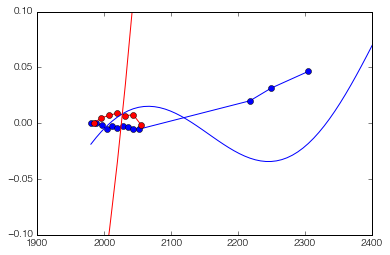

In [154]:
times = pd.DataFrame(times)
times.index = times.i_planet
i_epoch = np.arange(100)
i_planet = np.ones_like(i_epoch)
tc = ttvmod.compute(p1,i_planet,i_epoch)
timesmod = pd.DataFrame(dict(i_planet=i_planet,i_epoch=i_epoch,tc=tc))
i_planet = np.ones_like(i_epoch)*2
tc = ttvmod.compute(p1,i_planet,i_epoch)

timesmod = timesmod.append(pd.DataFrame(dict(i_planet=i_planet,i_epoch=i_epoch,tc=tc)))
timesmod = timesmod.sort_values(by='tc')
timesmod.index = timesmod.i_planet
ttv.plotting.plot_omc(times.ix[1,'i_epoch'], times.ix[1,'tc'], 7.92, 1980.38403, marker='o',color='b')
ttv.plotting.plot_omc(times.ix[2,'i_epoch'], times.ix[2,'tc'], 11.907, 1984.27227,marker='o',color='r')
ttv.plotting.plot_omc(timesmod.ix[1,'i_epoch'], timesmod.ix[1,'tc'], 7.92, 1980.38403, 'b')
ttv.plotting.plot_omc(timesmod.ix[2,'i_epoch'], timesmod.ix[2,'tc'], 11.907, 1984.27227,color='r')
xlim(1900,2400)
ylim(-0.1,0.1)

In [ ]:
# Using the K2 transit times, fit for the per1, tc1, per2, and tc2 with different assumed values of mass1